In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('curriculum_logs.csv')

In [3]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847330 entries, 0 to 847329
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        847330 non-null  object 
 1   time        847330 non-null  object 
 2   path        847329 non-null  object 
 3   user_id     847330 non-null  int64  
 4   cohort_id   847330 non-null  int64  
 5   ip          847330 non-null  object 
 6   id          847330 non-null  int64  
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       float64
 14  program_id  847330 non-null  int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 97.0+ MB


In [5]:
df.describe()

,user_id,cohort_id,id,deleted_at,program_id
count,847330.000000,847330.000000,847330.000000,0.0,847330.000000
mean,456.707344,48.501049,48.501049,NaN,2.086004
std,250.734201,32.795482,32.795482,NaN,0.388231
min,1.000000,1.000000,1.000000,NaN,1.000000
25%,263.000000,28.000000,28.000000,NaN,2.000000
50%,476.000000,33.000000,33.000000,NaN,2.000000
75%,648.000000,57.000000,57.000000,NaN,2.000000
max,981.000000,139.000000,139.000000,NaN,4.000000


In [6]:
df.id.unique()

array([  8,  22,  21,   1,  16,  18,  19,  13,  14,  15,   7,   4,  12,
        17,  23,   2,   9,  11,  24,  25,  26,   6,  27,  28,  29,  31,
        32,  33,  34,  51,  52,  53,  55,  56,  57,   5,  58,  59,  61,
        62, 132, 134, 133, 135, 138, 137, 139])

In [7]:
df.program_id.unique()

array([1, 2, 4, 3])

In [8]:
df.cohort_id.unique()

array([  8,  22,  21,   1,  16,  18,  19,  13,  14,  15,   7,   4,  12,
        17,  23,   2,   9,  11,  24,  25,  26,   6,  27,  28,  29,  31,
        32,  33,  34,  51,  52,  53,  55,  56,  57,   5,  58,  59,  61,
        62, 132, 134, 133, 135, 138, 137, 139])

In [9]:
df.name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Staff',
       'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos',
       'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Everglades',
       'Hyperion', 'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna',
       'Easley', 'Marco', 'Neptune', 'Florence', 'Oberon'], dtype=object)

In [10]:
# Reassign the sale_date column to be a datetime type
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Set the index as that date and then sort index (by the date)
df = df.set_index(['datetime']).sort_index()

del df['date']
del df['time']

In [11]:
# Reassign the date-type columns to be a datetime type
df['start_date'] = pd.to_datetime(df['start_date'])


In [12]:
df['end_date'] = pd.to_datetime(df['end_date'])

In [13]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [14]:
df['updated_at'] = pd.to_datetime(df['updated_at'])

In [15]:
#df['deleted_at'] = pd.to_datetime(df['deleted_at'])

In [16]:
df.drop(['id'], axis=1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
datetime,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,jquery/personal-site,64,28,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
2021-04-21 16:42:02,jquery/mapbox-api,64,28,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
2021-04-21 16:42:09,jquery/ajax/weather-map,64,28,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2


In [17]:
df = df[['start_date','end_date','program_id','user_id','cohort_id','name','slack','path','ip','created_at','updated_at','deleted_at']]

In [18]:
df.head()

,start_date,end_date,program_id,user_id,cohort_id,name,slack,path,ip,created_at,updated_at,deleted_at
datetime,,,,,,,,,,,,
2018-01-26 09:55:03,2015-09-22,2016-02-06,1,1,8,Hampton,#hampton,/,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:02,2015-09-22,2016-02-06,1,1,8,Hampton,#hampton,java-ii,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:05,2015-09-22,2016-02-06,1,1,8,Hampton,#hampton,java-ii/object-oriented-programming,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:06,2015-09-22,2016-02-06,1,1,8,Hampton,#hampton,slides/object_oriented_programming,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:24,2018-01-08,2018-05-17,2,2,22,Teddy,#teddy,javascript-i/conditionals,97.105.19.61,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN


# Label students by the program they are in.

In [19]:
dict_map = {1:'PHP', 2:'Java', 3:'Data Science',4:'Front-End'}
update = df['program_id'].map(dict_map)
df['program_id'] = update
print(df)

                    start_date   end_date program_id  user_id  cohort_id  \
datetime                                                                   
2018-01-26 09:55:03 2015-09-22 2016-02-06        PHP        1          8   
2018-01-26 09:56:02 2015-09-22 2016-02-06        PHP        1          8   
2018-01-26 09:56:05 2015-09-22 2016-02-06        PHP        1          8   
2018-01-26 09:56:06 2015-09-22 2016-02-06        PHP        1          8   
2018-01-26 09:56:24 2018-01-08 2018-05-17       Java        2         22   
...                        ...        ...        ...      ...        ...   
2021-04-21 16:41:51 2014-02-04 2014-02-04       Java       64         28   
2021-04-21 16:42:02 2014-02-04 2014-02-04       Java       64         28   
2021-04-21 16:42:09 2014-02-04 2014-02-04       Java       64         28   
2021-04-21 16:44:37 2014-02-04 2014-02-04       Java      744         28   
2021-04-21 16:44:39 2014-02-04 2014-02-04       Java       64         28   

           

In [20]:
df.head()

,start_date,end_date,program_id,user_id,cohort_id,name,slack,path,ip,created_at,updated_at,deleted_at
datetime,,,,,,,,,,,,
2018-01-26 09:55:03,2015-09-22,2016-02-06,PHP,1,8,Hampton,#hampton,/,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:02,2015-09-22,2016-02-06,PHP,1,8,Hampton,#hampton,java-ii,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:05,2015-09-22,2016-02-06,PHP,1,8,Hampton,#hampton,java-ii/object-oriented-programming,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:06,2015-09-22,2016-02-06,PHP,1,8,Hampton,#hampton,slides/object_oriented_programming,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:24,2018-01-08,2018-05-17,Java,2,22,Teddy,#teddy,javascript-i/conditionals,97.105.19.61,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN


In [40]:
df.groupby(['program_id'])['cohort_id'].unique()

program_id
Data Science                               [34, 55, 59, 133, 137]
Front-End                                                     [9]
Java            [22, 21, 16, 18, 15, 23, 24, 25, 26, 27, 28, 2...
PHP                 [8, 1, 19, 13, 14, 7, 4, 12, 17, 2, 11, 6, 5]
Name: cohort_id, dtype: object

In [42]:
java=df.program_id =='Java'

In [43]:
java

datetime
2018-01-26 09:55:03    False
2018-01-26 09:56:02    False
2018-01-26 09:56:05    False
2018-01-26 09:56:06    False
2018-01-26 09:56:24     True
                       ...  
2021-04-21 16:41:51     True
2021-04-21 16:42:02     True
2021-04-21 16:42:09     True
2021-04-21 16:44:37     True
2021-04-21 16:44:39     True
Name: program_id, Length: 847330, dtype: bool

# Is it possible to identify the user_id of a staff member?

In [21]:
df.name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Staff',
       'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos',
       'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Everglades',
       'Hyperion', 'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna',
       'Easley', 'Marco', 'Neptune', 'Florence', 'Oberon'], dtype=object)

In [22]:
df.loc[df['name'] == 'Staff']

,start_date,end_date,program_id,user_id,cohort_id,name,slack,path,ip,created_at,updated_at,deleted_at
datetime,,,,,,,,,,,,
2018-12-06 14:15:29,2014-02-04,2014-02-04,Java,53,28,Staff,#,appendix/further-reading/java/intellij-tomcat-...,97.105.19.58,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN
2018-12-06 14:25:40,2014-02-04,2014-02-04,Java,314,28,Staff,#,javascript-i,97.105.19.58,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN
2018-12-06 14:25:41,2014-02-04,2014-02-04,Java,314,28,Staff,#,javascript-i/coffee-project,97.105.19.58,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN
2018-12-06 15:31:29,2014-02-04,2014-02-04,Java,40,28,Staff,#,spring,170.248.173.247,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN
2018-12-06 15:31:33,2014-02-04,2014-02-04,Java,40,28,Staff,#,spring/fundamentals/security,170.248.173.247,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,2014-02-04,2014-02-04,Java,64,28,Staff,#,jquery/personal-site,71.150.217.33,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN
2021-04-21 16:42:02,2014-02-04,2014-02-04,Java,64,28,Staff,#,jquery/mapbox-api,71.150.217.33,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN
2021-04-21 16:42:09,2014-02-04,2014-02-04,Java,64,28,Staff,#,jquery/ajax/weather-map,71.150.217.33,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN


# Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_date  847330 non-null  datetime64[ns]
 1   end_date    847330 non-null  datetime64[ns]
 2   program_id  847330 non-null  object        
 3   user_id     847330 non-null  int64         
 4   cohort_id   847330 non-null  int64         
 5   name        847330 non-null  object        
 6   slack       847330 non-null  object        
 7   path        847329 non-null  object        
 8   ip          847330 non-null  object        
 9   created_at  847330 non-null  datetime64[ns]
 10  updated_at  847330 non-null  datetime64[ns]
 11  deleted_at  0 non-null       float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(5)
memory usage: 84.0+ MB


In [24]:
df.index > df.end_date

array([ True,  True,  True, ...,  True,  True,  True])

In [25]:
students=df.loc[df['name'] != 'Staff']


In [26]:
students

,start_date,end_date,program_id,user_id,cohort_id,name,slack,path,ip,created_at,updated_at,deleted_at
datetime,,,,,,,,,,,,
2018-01-26 09:55:03,2015-09-22,2016-02-06,PHP,1,8,Hampton,#hampton,/,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:02,2015-09-22,2016-02-06,PHP,1,8,Hampton,#hampton,java-ii,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:05,2015-09-22,2016-02-06,PHP,1,8,Hampton,#hampton,java-ii/object-oriented-programming,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:06,2015-09-22,2016-02-06,PHP,1,8,Hampton,#hampton,slides/object_oriented_programming,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:24,2018-01-08,2018-05-17,Java,2,22,Teddy,#teddy,javascript-i/conditionals,97.105.19.61,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,2021-01-25,2021-07-19,Java,869,135,Marco,#marco,jquery/personal-site,136.50.98.51,2021-01-20 21:31:11,2021-01-20 21:31:11,NaN
2021-04-21 16:36:34,2021-03-15,2021-09-03,Java,948,138,Neptune,#neptune,html-css/css-ii/bootstrap-grid-system,104.48.214.211,2021-03-15 19:57:09,2021-03-15 19:57:09,NaN
2021-04-21 16:37:48,2020-12-07,2021-06-08,Java,834,134,Luna,#luna,java-iii,67.11.50.23,2020-12-07 16:58:43,2020-12-07 16:58:43,NaN


In [27]:
students=students[students.index > students.end_date]


In [30]:
students

,start_date,end_date,program_id,user_id,cohort_id,name,slack,path,ip,created_at,updated_at,deleted_at
datetime,,,,,,,,,,,,
2018-01-26 09:55:03,2015-09-22,2016-02-06,PHP,1,8,Hampton,#hampton,/,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:02,2015-09-22,2016-02-06,PHP,1,8,Hampton,#hampton,java-ii,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:05,2015-09-22,2016-02-06,PHP,1,8,Hampton,#hampton,java-ii/object-oriented-programming,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 09:56:06,2015-09-22,2016-02-06,PHP,1,8,Hampton,#hampton,slides/object_oriented_programming,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
2018-01-26 10:14:47,2014-02-04,2014-04-22,PHP,11,1,Arches,#arches,/,97.105.19.61,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 15:20:12,2020-07-13,2021-01-12,Data Science,692,59,Darden,#darden,classification/classical_programming_vs_machin...,96.8.130.134,2020-07-13 18:32:19,2020-07-13 18:32:19,NaN
2021-04-21 15:20:12,2020-07-13,2021-01-12,Data Science,692,59,Darden,#darden,classification/scale_features_or_not.svg,96.8.130.134,2020-07-13 18:32:19,2020-07-13 18:32:19,NaN
2021-04-21 15:20:14,2020-07-13,2021-01-12,Data Science,692,59,Darden,#darden,classification/project,96.8.130.134,2020-07-13 18:32:19,2020-07-13 18:32:19,NaN


In [31]:
pages = students['path'].resample('d').count()
pages.head()

datetime
2018-01-26     37
2018-01-27     42
2018-01-28     23
2018-01-29     58
2018-01-30    126
Freq: D, Name: path, dtype: int64

<AxesSubplot:xlabel='datetime'>

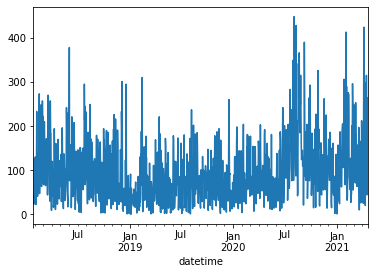

In [32]:
pages.plot()

# Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2. 

In [33]:
# 7 day EMA
ema_7d = pages.ewm(span=7).mean()
ema_7d.head()

datetime
2018-01-26    37.000000
2018-01-27    39.857143
2018-01-28    32.567568
2018-01-29    41.868571
2018-01-30    69.445583
Freq: D, Name: path, dtype: float64

In [34]:
# 14 day EMA
ema_14d = pages.ewm(span=14).mean()
ema_14d.head()

datetime
2018-01-26    37.000000
2018-01-27    39.678571
2018-01-28    33.307301
2018-01-29    40.861494
2018-01-30    63.074000
Freq: D, Name: path, dtype: float64

In [35]:
# 30 day EMA
ema_30d = pages.ewm(span=30).mean()
ema_30d.head()

datetime
2018-01-26    37.000000
2018-01-27    39.583333
2018-01-28    33.683080
2018-01-29    40.383278
2018-01-30    59.863155
Freq: D, Name: path, dtype: float64

In [36]:
# 90 day EMA
ema_90d = pages.ewm(span=90).mean()
ema_90d.head()

datetime
2018-01-26    37.000000
2018-01-27    39.527778
2018-01-28    33.895642
2018-01-29    40.124072
2018-01-30    58.070985
Freq: D, Name: path, dtype: float64

In [37]:
# 900000000 day EMA
ema_90d = pages.ewm(span=900000000).mean()
ema_90d.head()

datetime
2018-01-26    37.0
2018-01-27    39.5
2018-01-28    34.0
2018-01-29    40.0
2018-01-30    57.2
Freq: D, Name: path, dtype: float64

# Plot the access activity of these students.